In [3]:
import pandas as pd
df = pd.read_csv("dreams_labeled_balanced.csv")
df

,content,label
0,(1960-05-04)I had another neat dream about Blake.,neutral
1,(1963-??-??)I had a Salvador Dali dream where ...,neutral
2,(1964-??-??)A red faced devil comes to me and ...,nightmare
3,(1969-??-??)I woke from a nap unable to rememb...,neutral
4,(1974-01-17)Dreamt of IVs. Lots of waterfalls.,neutral
...,...,...
3556,"(12/7/92)I am some sort of clerk, perhaps a me...",nightmare
3557,(12/2/92)I am watching TV early in the morning...,sad
3558,"(8/3/94)I'm in the library, just arriving (lat...",sad
3559,"[lost - do some stuff, notice the clock, somet...",sad


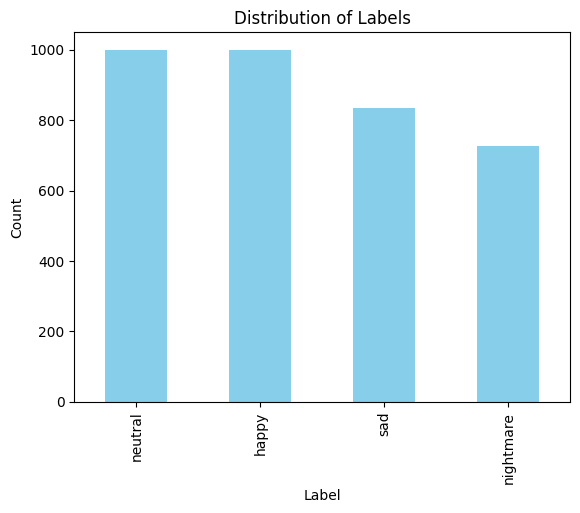

In [4]:
import matplotlib.pyplot as plt
df['label'].value_counts().plot(kind='bar', color='skyblue', title='Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [5]:
df['label'].value_counts(normalize=True) * 100


label
neutral      28.081999
happy        28.081999
sad          23.420388
nightmare    20.415614
Name: proportion, dtype: float64

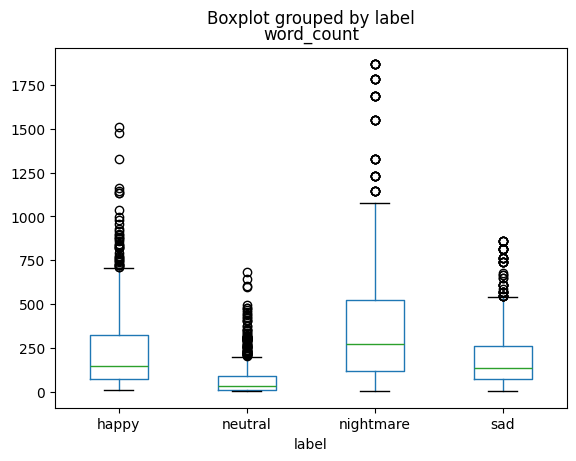

In [7]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df.groupby('label')['word_count'].describe()
df.boxplot(column='word_count', by='label', grid=False)
plt.show()


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['content'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq.sum().sort_values(ascending=False).head(20)


like      3725
don       2473
just      2347
know      2089
think     1961
say       1942
people    1911
look      1804
room      1788
going     1772
says      1765
ve        1674
house     1613
man       1523
come      1366
sort      1356
ll        1303
door      1258
want      1208
little    1207
dtype: int64

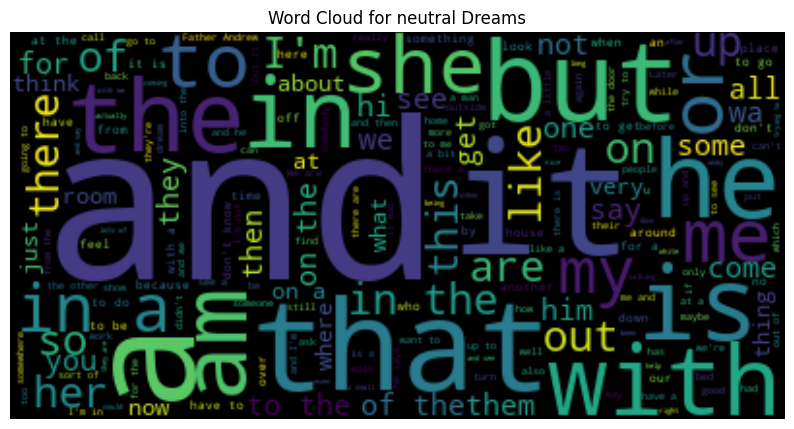

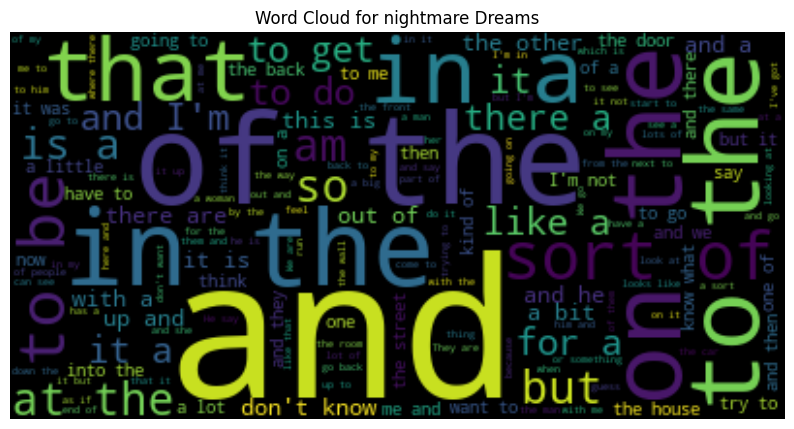

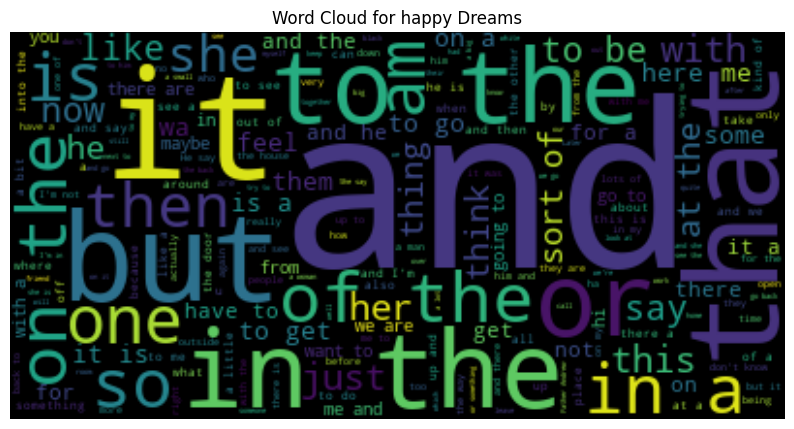

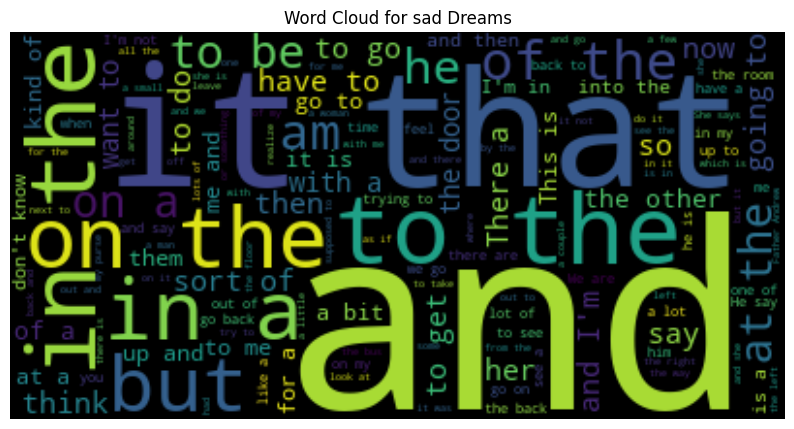

In [9]:
from wordcloud import WordCloud
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['content'])
    wordcloud = WordCloud(stopwords='english').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Dreams')
    plt.axis('off')
    plt.show()


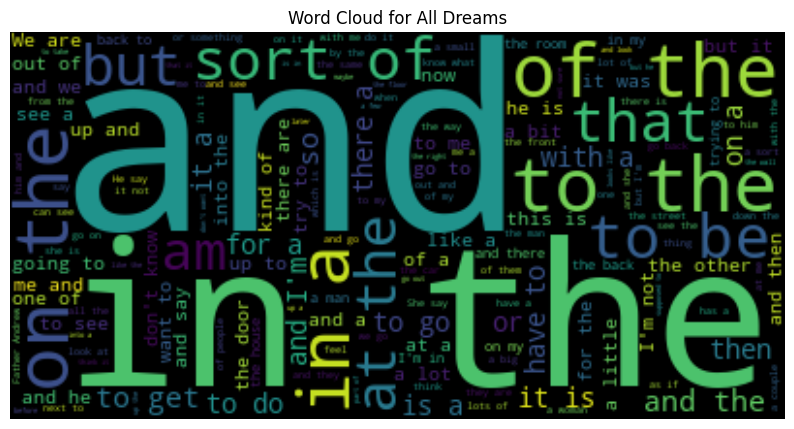

In [10]:
text_all = " ".join(df['content'])
wordcloud_all = WordCloud(stopwords='english').generate(text_all)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud for All Dreams')
plt.axis('off')
plt.show()
